## ML Linear Regression

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score, mean_squared_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
def creat_df(df, crime, col1, col2, col3):
    kff = pd.DataFrame(df, columns = [crime,col1,col3,col2])
    return kff

In [3]:
def creat_prdictVSactual_multyple(coef, intercept_, df, crime, col1, col2, col3=None):
    
    b0 = intercept_
    x1=df[col1]
    x2=df[col2]
    col4="Predict "+ crime
    
    if col3!=None:
        b1 = coef[0]
        b2 = coef[1]
        b3 = coef[2]
        x3=df[col3]
        df[col4] = b0+b1*(x1)+b2*(x2)+b3*(x3)
        print ("im in: col3!=None:")
    else:
        b1 = coef[0][0]
        b2 = coef[0][1]
        b3 = coef[0][2]
        df[col4] = b0+b1*(x1)+b2*(x2)+b3*(x1)*(x2)
        print ("im in: else")

    x=df[{crime,col4}]
    
    x.insert(len(x.columns), "diff",  x[col4]-x[crime])
    x=abs(x)
    x['dvision %'] = (x['diff'] / x['diff'].sum()) * 100
    
    x.columns = ['Actual '+  crime, col4, crime +'deviation', crime + 'deviation in %']
    x.insert(0,'State',value=df_kff['State'])
    return x




In [4]:
def creat_scatter_3(df, crime, col1, col2, col3):
    kff = pd.DataFrame(df, columns = [crime,col1,col3,col2])
    plt.scatter(x=kff[col1],y=kff[crime],c='k',marker='o',label=col1)
    plt.scatter(x=kff[col2],y=kff[crime],c='b',marker='*',label=col2)
    plt.scatter(x=kff[col3],y=kff[crime],c='r',marker='s',label=col3)

    plt.legend(numpoints=1,loc=4)
    plt.xlabel('Normalized Criteria')
    plt.ylabel(crime)
    plt.show()

In [5]:
def single_lm(kff, crime, tag):
    lr_tag= linear_model.LinearRegression() 
    
    x = kff[tag].values.reshape(kff[tag].shape[0],1)
    y = kff[crime].values.reshape(kff[crime].shape[0],1)

    lr_tag.fit(X=x, y=y)

    plt.scatter(x, y,  color='black')
    plt.plot(x, lr_tag.predict(x), color='blue', linewidth=3)

    plt.xlabel(tag)
    plt.ylabel(crime)
    plt.show()

    print("Slope:",lr_tag.coef_)
    print("Intercept:",lr_tag.intercept_)
    print("SSE:",mean_squared_error(kff[crime].tolist(),lr_tag.predict(kff.iloc[:,:1]).flatten())*len(kff[crime].tolist()))
    print("R2:",lr_tag.score(x,y))
    return lr_tag

In [6]:
def combin_lm(kff, crime, col1, col2, col3):
    #comine scatter 
    plt.scatter(x=kff[col1],y=kff[crime],c='r',marker='s',label=col1)
    plt.scatter(x=kff[col2],y=kff[crime],c='b',marker='o',label=col2)
    plt.scatter(x=kff[col3],y=kff[crime],c='k',marker='*',label=col3)
    plt.legend(numpoints=1,loc=4)

    plt.plot(kff[col1],lr_Burglary.predict(kff[col1].values.reshape(kff[col1].shape[0],1)),c='r',linewidth=3)
    plt.plot(kff[col2],lr_Poverty200.predict(kff[col2].values.reshape(kff[col2].shape[0],1)),c='b',linewidth=3)
    plt.plot(kff[col3],lr_Children.predict(kff[col3].values.reshape(kff[col3].shape[0],1)),c='k',linewidth=3)

    plt.xlabel('Criteria')
    plt.ylabel(crime)
    plt.show()

    lr = linear_model.LinearRegression() # create a linear regression object

    x = kff[[col1,col2,col3]]
    y = kff[crime]
    lr.fit(X=x, y=y);

    print("Slope:",lr.coef_)
    print("Intercept:",lr.intercept_)
    print("R2:",lr.score(x,y))
    
    return lr

In [7]:
def multiple_lm(df,crime, col1, col2):
    
    lr = linear_model.LinearRegression() # create a linear regression object

    kff[col1+"x"+col2]=kff[col1]*kff[col2]

    x = kff[[col1,col2,col1+"x"+col2]].values.reshape(kff[[col1,col2,col1+"x"+col2]].shape[0],3)
    y = kff[crime].values.reshape(kff[crime].shape[0],1)

    lr.fit(X=x, y=y)

    print("Slope:",lr.coef_)
    print("Intercept:",lr.intercept_)
    print("R2:",lr.score(x,y)) #miner improvement
    print (type(lr.coef_))
    return lr

In [8]:
def marge_crime_predict_lr_models(df_Y_S,dfKFF):
    result = pd.merge(df_Y_S, dfKFF, how="outer", on=['State'])
    return result

In [9]:
#path='/Users/barbenshabat/Downloads/Datascience/project/'
path='./proj_datasets/'
name='df_Y_S_KFF.xlsx'
df_kff=pd.read_excel(path+name, index_col=0) # read each file in the folder
df_kff.shape

(488, 100)

In [10]:
# copy the data
df_sklearn = df_kff.copy()
  
    
# apply normalization techniques
cols=df_kff.drop({'Governor Political Affiliation'},axis=1).iloc[:,2:].columns #all relevant numeric


#normlize
for column in cols: 
    df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))
    
    
#for future pedidt dfs
dfprcrime19 = df_sklearn[df_sklearn['Year']== 2019]
dfmotor19 = df_sklearn[df_sklearn['Year']== 2019]
df_sklearn=df_sklearn[df_sklearn['Year']!= 2019]

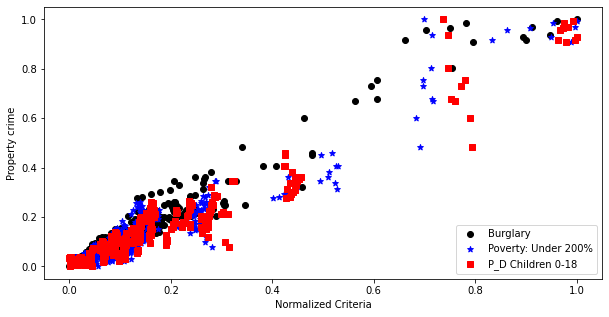

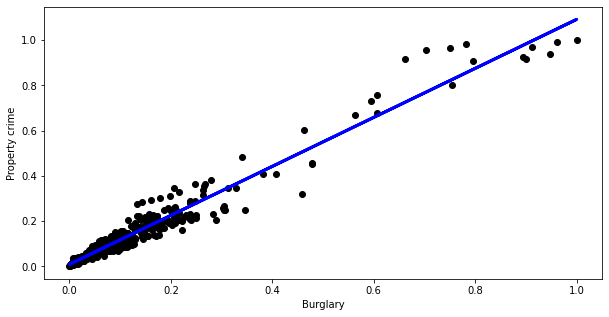

Slope: [[1.08228096]]
Intercept: [0.00926584]
SSE: 0.275111104383421
R2: 0.9556306221362623


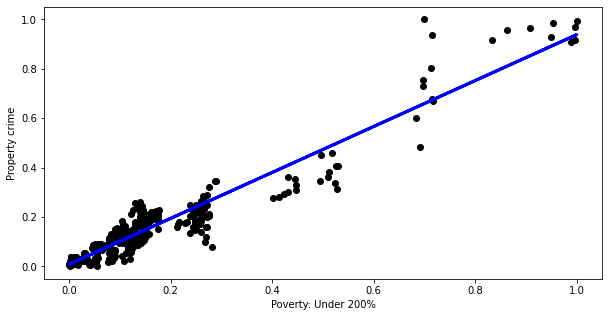

Slope: [[0.92915569]]
Intercept: [0.00900535]
SSE: 0.06650275351423576
R2: 0.9149854289867683


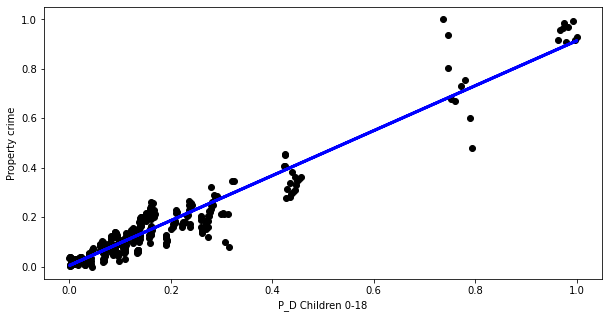

Slope: [[0.90932175]]
Intercept: [0.00448698]
SSE: 0.13634594641083958
R2: 0.9239420604002765


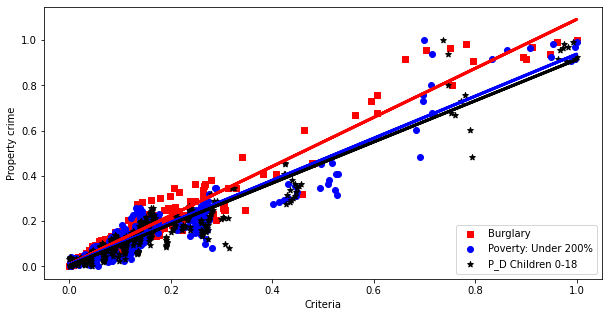

Slope: [ 0.69616646 -0.2117219   0.56569201]
Intercept: 0.0015625324258274065
R2: 0.9809942448856726
                     Property crime  Burglary  P_D Children 0-18  \
Property crime             1.000000  0.977564           0.961219   
Burglary                   0.977564  1.000000           0.920861   
P_D Children 0-18          0.961219  0.920861           1.000000   
Poverty: Under 200%        0.956549  0.926295           0.990089   

                     Poverty: Under 200%  
Property crime                  0.956549  
Burglary                        0.926295  
P_D Children 0-18               0.990089  
Poverty: Under 200%             1.000000  


c:\users\אלמוג\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


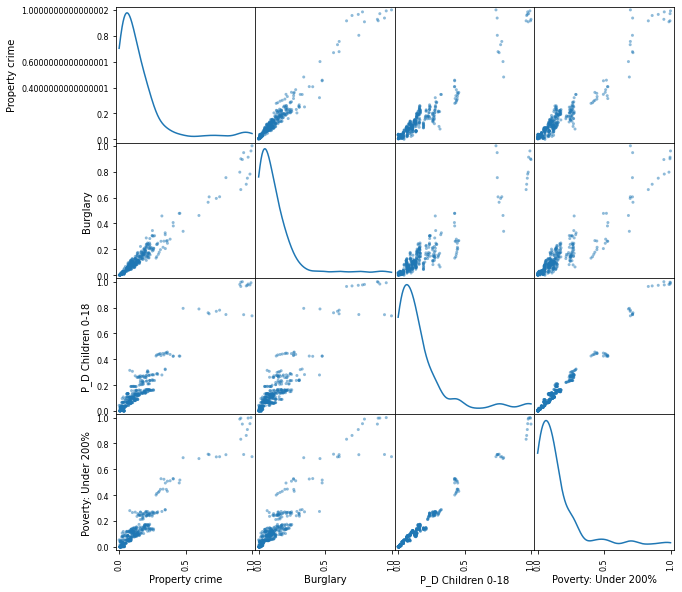

im in: col3!=None:


,State,Actual Property crime,Predict Property crime,Property crimedeviation,Property crimedeviation in %
440,ALASKA,0.013210,0.020901,0.007691,0.884225
441,ARIZONA,0.150297,0.187643,0.037346,4.293690
442,ARKANSAS,0.066151,0.077048,0.010897,1.252882
443,CALIFORNIA,0.780920,0.873472,0.092552,10.640843
444,COLORADO,0.109577,0.145451,0.035873,4.124434


In [12]:
#first model
kff = creat_df(df_sklearn, 'Property crime','Burglary','Poverty: Under 200%','P_D Children 0-18')
creat_scatter_3(kff, 'Property crime','Burglary','Poverty: Under 200%','P_D Children 0-18')
lr_Burglary=single_lm(kff, 'Property crime', 'Burglary')
lr_Poverty200=single_lm(kff, 'Property crime', 'Poverty: Under 200%')
lr_Children=single_lm(kff, 'Property crime', 'P_D Children 0-18')
combinlr=combin_lm(kff,'Property crime','Burglary','Poverty: Under 200%','P_D Children 0-18')#that one
print(kff.corr())
x=pd.plotting.scatter_matrix(kff, figsize=(10, 10), diagonal='kde')
plt.show()
model1=creat_prdictVSactual_multyple(combinlr.coef_, combinlr.intercept_, dfprcrime19,'Property crime','Burglary','Poverty: Under 200%','P_D Children 0-18')
#model1.sort_values('Property crimedeviation in %')
model1.head()

In [15]:
## Trial model 
#Aggravated assault=β0+β1∗ (P_D Adults 26-34) +β2∗(Poverty: 100%+) +β3(P_D Adults 26-34∗Poverty: 100%+).

lr = linear_model.LinearRegression() # create a linear regression object
x = kff[["Poverty: Under 200%","P_D Children 0-18"]]
y = kff['Property crime']
lr.fit(X=x, y=y)
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)
print("R2:",lr.score(x,y))
x=lr.intercept_+(lr.coef_[0])*(0.000916)+(lr.coef_[1])*(0.001401)


lr=multiple_lm(kff,'Property crime', "Poverty: Under 200%", "P_D Children 0-18")
dfpred=creat_prdictVSactual_multyple(lr.coef_,lr.intercept_, dfprcrime19, 'Property crime', 'Poverty: Under 200%', 'P_D Children 0-18') 
dfpred.head()

Slope: [0.23917414 0.67869904]
Intercept: 0.00514763511841429
R2: 0.9251379013016204
Slope: [[0.17769681 0.55354202 0.23928997]]
Intercept: [0.01932127]
R2: 0.9311020274780658
<class 'numpy.ndarray'>
im in: else


,State,Actual Property crime,Predict Property crime,Property crimedeviation,Property crimedeviation in %
440,ALASKA,0.024108,0.020901,0.003207,0.206787
441,ARIZONA,0.145347,0.187643,0.042296,2.726874
442,ARKANSAS,0.069122,0.077048,0.007926,0.511023
443,CALIFORNIA,0.858911,0.873472,0.014561,0.938774
444,COLORADO,0.105753,0.145451,0.039698,2.559390


<AxesSubplot:>

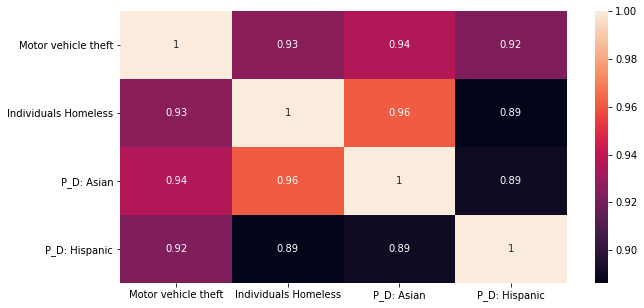

In [17]:
HeatMapMotorTheft = pd.DataFrame(df_sklearn, columns = ['Motor vehicle theft','Individuals Homeless','P_D: Asian','P_D: Hispanic'])
sns.heatmap(HeatMapMotorTheft.corr(), annot=True)

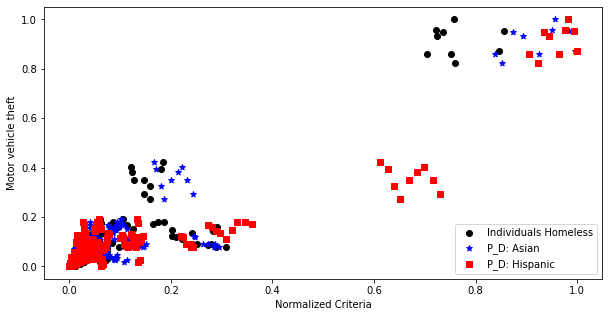

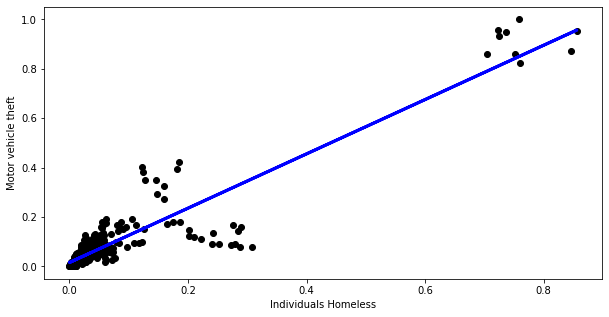

Slope: [[1.09894612]]
Intercept: [0.01599745]
SSE: 0.32153146137848165
R2: 0.856665667708379


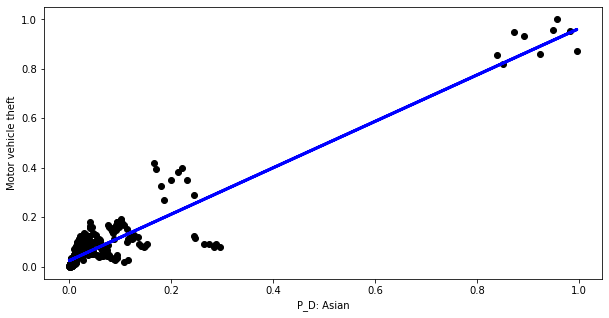

Slope: [[0.93848433]]
Intercept: [0.0242062]
SSE: 0.199158448123613
R2: 0.8762341920837196


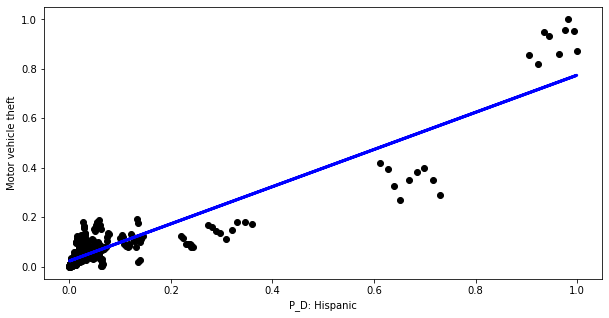

Slope: [[0.75174341]]
Intercept: [0.02268237]
SSE: 0.5067125162657482
R2: 0.8515118670716706


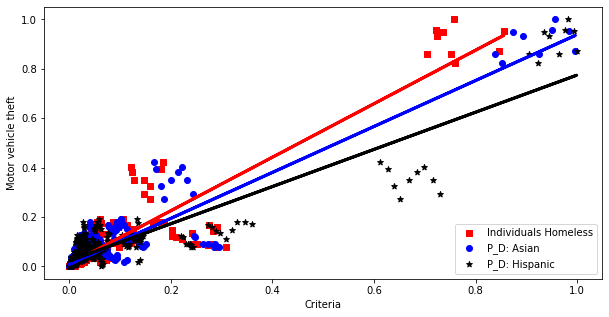

Slope: [0.21309735 0.40419956 0.3295725 ]
Intercept: 0.018719939797568044
R2: 0.9168174637824436
                      Motor vehicle theft  Individuals Homeless  \
Motor vehicle theft              1.000000              0.925562   
Individuals Homeless             0.925562              1.000000   
P_D: Hispanic                    0.922774              0.886288   
P_D: Asian                       0.936074              0.961239   

                      P_D: Hispanic  P_D: Asian  
Motor vehicle theft        0.922774    0.936074  
Individuals Homeless       0.886288    0.961239  
P_D: Hispanic              1.000000    0.890839  
P_D: Asian                 0.890839    1.000000  


c:\users\אלמוג\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


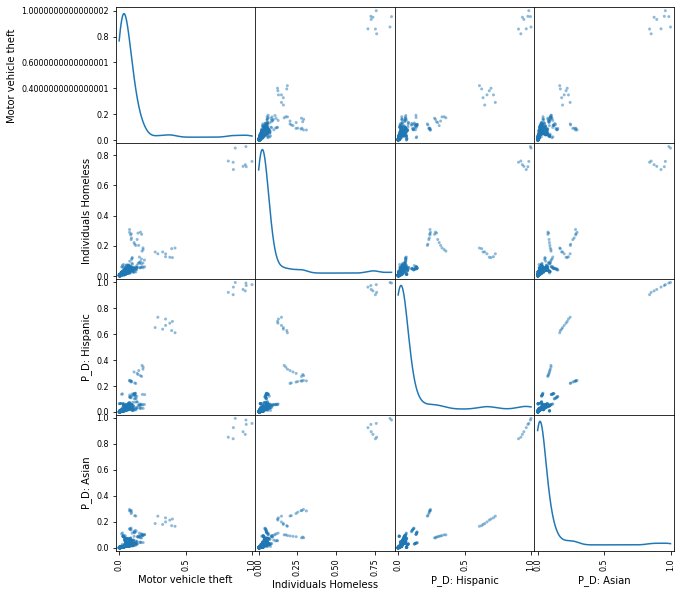

im in: col3!=None:


,State,Actual Motor vehicle theft,Predict Motor vehicle theft,Motor vehicle theftdeviation,Motor vehicle theftdeviation in %
440,ALASKA,0.015598,0.015598,0.008528,0.583323
441,ARIZONA,0.113644,0.113644,0.018249,1.248219
442,ARKANSAS,0.037993,0.037993,0.008252,0.564430
443,CALIFORNIA,0.776509,0.776509,0.189081,12.932862
444,COLORADO,0.128346,0.128346,0.059312,4.056867


In [19]:
kff = creat_df(df_sklearn,'Motor vehicle theft','Individuals Homeless','P_D: Asian','P_D: Hispanic')
kff
creat_scatter_3(kff,'Motor vehicle theft','Individuals Homeless','P_D: Asian','P_D: Hispanic')
lr_Homless=single_lm(kff, 'Motor vehicle theft', 'Individuals Homeless')
lr_Asian=single_lm(kff, 'Motor vehicle theft', 'P_D: Asian')
lr_Children=single_lm(kff, 'Motor vehicle theft', 'P_D: Hispanic')
combinlr=combin_lm(kff,'Motor vehicle theft','Individuals Homeless','P_D: Asian','P_D: Hispanic')#that one
print(kff.corr())
x=pd.plotting.scatter_matrix(kff, figsize=(10, 10), diagonal='kde')
plt.show()

model2=creat_prdictVSactual_multyple(combinlr.coef_, combinlr.intercept_, dfprcrime19,'Motor vehicle theft','Individuals Homeless','P_D: Asian','P_D: Hispanic')

tmp = model2.loc[:,'Actual Motor vehicle theft']
model2.loc[:,'Actual Motor vehicle theft'] = model2.loc[:,'Predict Motor vehicle theft']
model2.loc[:,'Predict Motor vehicle theft'] = tmp
model2.head()


In [21]:
## Not succesfuly trial model :) 
lr=multiple_lm(kff,'Motor vehicle theft', "Individuals Homeless", "P_D: Asian")
dfpred=creat_prdictVSactual_multyple(lr.coef_,lr.intercept_, dfprcrime19, 'Motor vehicle theft', 'Individuals Homeless', 'P_D: Asian') 
dfpred.sort_values('Motor vehicle theftdeviation in %')
dfpred.head()

Slope: [[0.38220077 0.55073674 0.11028043]]
Intercept: [0.02273198]
R2: 0.8855763563987326
<class 'numpy.ndarray'>
im in: else


,State,Actual Motor vehicle theft,Predict Motor vehicle theft,Motor vehicle theftdeviation,Motor vehicle theftdeviation in %
440,ALASKA,0.029642,0.015598,0.014043,0.787730
441,ARIZONA,0.066494,0.113644,0.047150,2.644746
442,ARKANSAS,0.032721,0.037993,0.005272,0.295695
443,CALIFORNIA,1.065950,0.776509,0.289441,16.235407
444,COLORADO,0.060704,0.128346,0.067642,3.794189


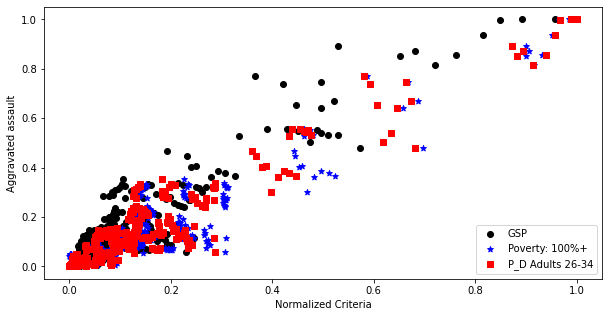

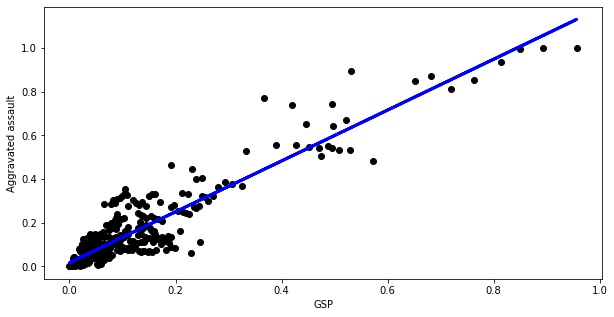

Slope: [[1.16466867]]
Intercept: [0.01718606]
SSE: 1.0485127422872167
R2: 0.8606244158941037


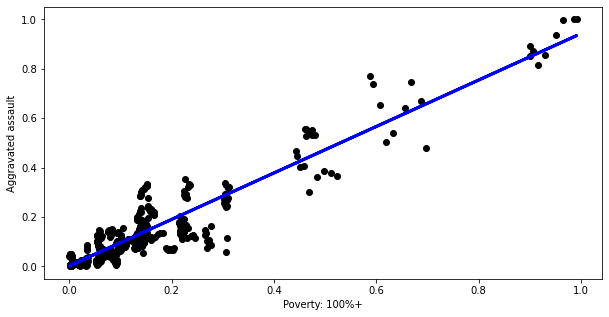

Slope: [[0.93979379]]
Intercept: [0.00260287]
SSE: 0.062250611915334035
R2: 0.8820299665350392


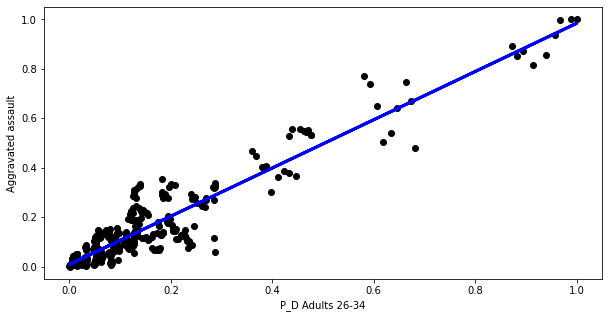

Slope: [[0.9760404]]
Intercept: [0.00863063]
SSE: 0.020556750947044806
R2: 0.8909720092066655


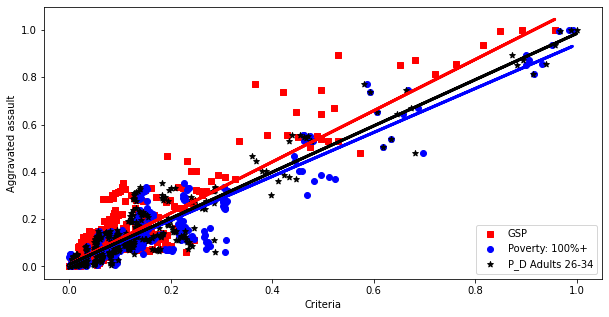

Slope: [-0.06393754 -0.26129338  1.29692561]
Intercept: 0.010363243541637451
R2: 0.8914105727015907
                    Aggravated assault       GSP  P_D Adults 26-34  \
Aggravated assault            1.000000  0.927698          0.943913   
GSP                           0.927698  1.000000          0.983481   
P_D Adults 26-34              0.943913  0.983481          1.000000   
Poverty: 100%+                0.939165  0.976150          0.996620   

                    Poverty: 100%+  
Aggravated assault        0.939165  
GSP                       0.976150  
P_D Adults 26-34          0.996620  
Poverty: 100%+            1.000000  


c:\users\אלמוג\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


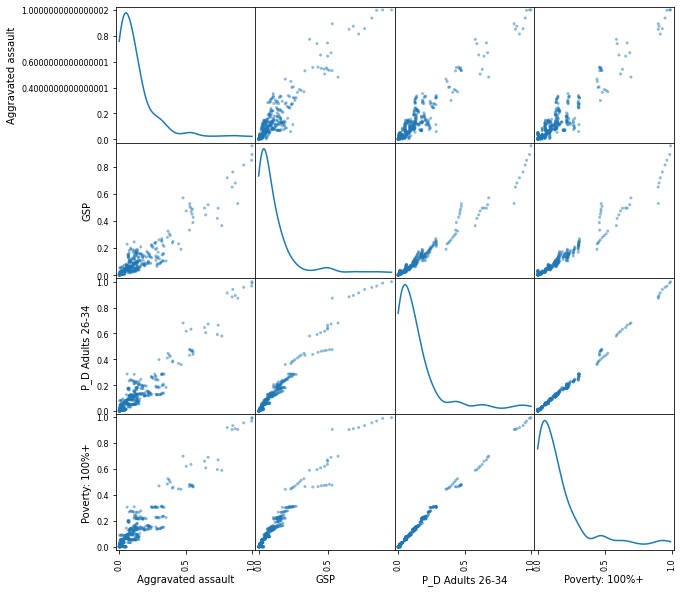

im in: col3!=None:


,State,Actual Aggravated assault,Predict Aggravated assault,Aggravated assaultdeviation,Aggravated assaultdeviation in %
440,ALASKA,0.042357,0.017518,0.024839,1.226125
441,ARIZONA,0.211595,0.157011,0.054584,2.694461
442,ARKANSAS,0.127862,0.060796,0.067066,3.310606
443,CALIFORNIA,0.952069,0.979359,0.027291,1.347163
444,COLORADO,0.143903,0.147830,0.003928,0.193886


In [23]:
## Succesful model 

kff = creat_df(df_sklearn,'Aggravated assault','GSP','Poverty: 100%+','P_D Adults 26-34')
creat_scatter_3(kff,'Aggravated assault','GSP','Poverty: 100%+','P_D Adults 26-34')
lr_Homless=single_lm(kff, 'Aggravated assault', 'GSP')
lr_Asian=single_lm(kff, 'Aggravated assault', 'Poverty: 100%+')
lr_Children=single_lm(kff, 'Aggravated assault', 'P_D Adults 26-34')
combinlr=combin_lm(kff,'Aggravated assault','GSP','Poverty: 100%+','P_D Adults 26-34')#that one
print(kff.corr())
x=pd.plotting.scatter_matrix(kff, figsize=(10, 10), diagonal='kde')
plt.show()
model3=creat_prdictVSactual_multyple(combinlr.coef_, combinlr.intercept_, dfprcrime19,'Aggravated assault','GSP','Poverty: 100%+','P_D Adults 26-34')
model3.sort_values('Aggravated assaultdeviation in %')
model3.head()

c:\users\אלמוג\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


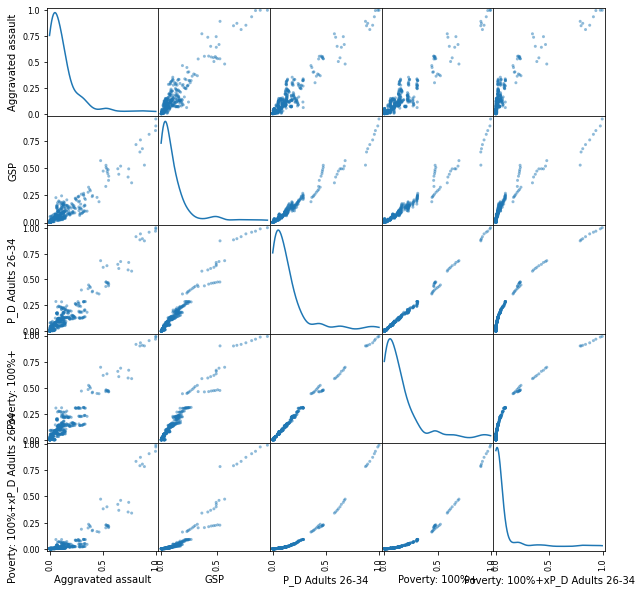

In [35]:
x=pd.plotting.scatter_matrix(kff, figsize=(10, 10), diagonal='kde')

In [24]:
## This model is better than the above but its negligible 
lr=multiple_lm(kff,'Aggravated assault', "Poverty: 100%+", "P_D Adults 26-34")
dfpred=creat_prdictVSactual_multyple(lr.coef_,lr.intercept_, dfprcrime19, 'Aggravated assault', 'Poverty: 100%+', 'P_D Adults 26-34') 
dfpred.sort_values('Aggravated assaultdeviation in %')

dfpred.head()

Slope: [[-0.37590395  1.41575022 -0.06880705]]
Intercept: [0.00794492]
R2: 0.8915795337100929
<class 'numpy.ndarray'>
im in: else


,State,Actual Aggravated assault,Predict Aggravated assault,Aggravated assaultdeviation,Aggravated assaultdeviation in %
440,ALASKA,0.042357,0.015940,0.026418,1.325446
441,ARIZONA,0.211595,0.158644,0.052951,2.656703
442,ARKANSAS,0.127862,0.059802,0.068060,3.414746
443,CALIFORNIA,0.952069,0.976182,0.024113,1.209809
444,COLORADO,0.143903,0.152454,0.008551,0.429022


In [30]:
#The chosen models are : model1, model2, model3 as stated above.

df = marge_crime_predict_lr_models(model1,model2)
df = marge_crime_predict_lr_models(df,model3)
df.to_excel('./proj_datasets/Lr models 123.xlsx',engine='xlsxwriter')

In [33]:
df.head(10)

,State,Actual Property crime,Predict Property crime,Property crimedeviation,Property crimedeviation in %,Actual Motor vehicle theft,Predict Motor vehicle theft,Motor vehicle theftdeviation,Motor vehicle theftdeviation in %,Actual Aggravated assault,Predict Aggravated assault,Aggravated assaultdeviation,Aggravated assaultdeviation in %
0,ALASKA,0.013210,0.020901,0.007691,0.884225,0.015598,0.015598,0.008528,0.583323,0.042357,0.017518,0.024839,1.226125
1,ARIZONA,0.150297,0.187643,0.037346,4.293690,0.113644,0.113644,0.018249,1.248219,0.211595,0.157011,0.054584,2.694461
2,ARKANSAS,0.066151,0.077048,0.010897,1.252882,0.037993,0.037993,0.008252,0.564430,0.127862,0.060796,0.067066,3.310606
3,CALIFORNIA,0.780920,0.873472,0.092552,10.640843,0.776509,0.776509,0.189081,12.932862,0.952069,0.979359,0.027291,1.347163
4,COLORADO,0.109577,0.145451,0.035873,4.124434,0.128346,0.128346,0.059312,4.056867,0.143903,0.147830,0.003928,0.193886
5,CONNECTICUT,0.048252,0.051920,0.003668,0.421712,0.035722,0.035722,0.009417,0.644084,0.034698,0.066016,0.031318,1.545976
6,DELAWARE,0.008779,0.010256,0.001477,0.169825,0.004883,0.004883,0.018433,1.260826,0.016122,0.018752,0.002630,0.129818
7,DISTRICT OF COLUMBIA,0.007717,0.036276,0.028559,3.283516,0.016995,0.016995,0.010637,0.727574,0.051870,0.027770,0.024100,1.189662
8,FLORIDA,0.278298,0.326461,0.048163,5.537425,0.161426,0.161426,0.052961,3.622451,0.368935,0.428215,0.059280,2.926247
9,HAWAII,0.024350,0.035372,0.011022,1.267220,0.028683,0.028683,0.036982,2.529545,0.014910,0.026503,0.011594,0.572309


## Might be good to try build a model with these features.

<AxesSubplot:>

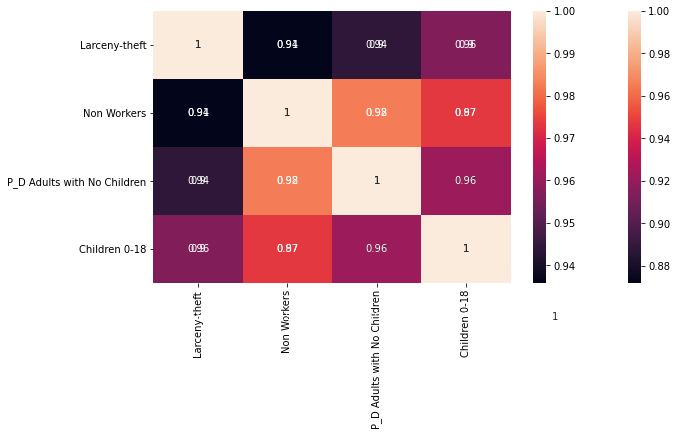

In [26]:


df_1 = pd.DataFrame(df_sklearn, columns = ['Forcible rape','Aggravated assault', 'Chlamydia Man','Gonorrhea Man','Poverty: 100%+'])
sns.heatmap(df_1.corr(), annot=True)


<AxesSubplot:>

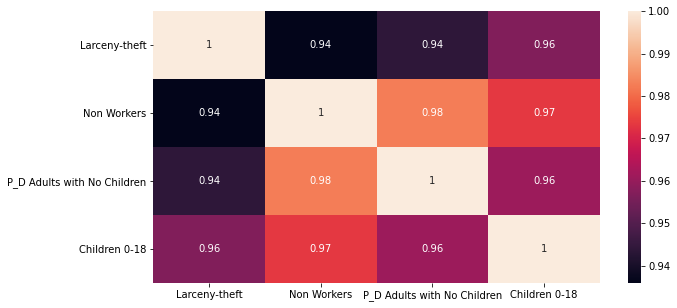

In [27]:

df_2 = pd.DataFrame(df_sklearn, columns = ['Larceny-theft','Non Workers','P_D Adults with No Children','Children 0-18'])
sns.heatmap(df_2.corr(), annot=True)

In [ ]:
divper = pd.DataFrame(df, columns = ['Property crimedeviation in %', 'Motor vehicle theftdeviation in %', 'Aggravated assaultdeviation in %'])
divper.describe()